# Bivariate Analysis

StateHoliday and Sales

In [1]:
import numpy as np
import pandas as pd
import sys, os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from file_handler import FileHandler
from df_selector import *
from df_cleaner import *
from df_visualizer import *

In [3]:
# reading the store csv file
df = pd.read_csv("../data/merged_store.csv", low_memory=False)

df.head(4)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionBeforeStoreOpened,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,2008,0,0,0,"0,0,0,0",0,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,2007,1,13,2010,"Jan,Apr,Jul,Oct",0,1,4,7,10
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,2006,1,14,2011,"Jan,Apr,Jul,Oct",0,1,4,7,10
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,2009,0,0,0,"0,0,0,0",0,0,0,0,0


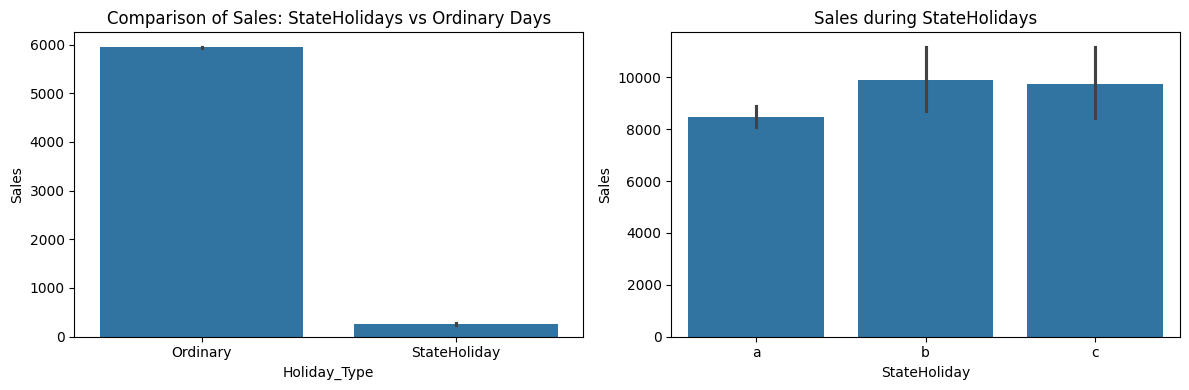

In [4]:
# Create the figure and subplots
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(12, 4))

# Prepare data for the first subplot
# Melting the DataFrame to compare Sales during StateHolidays and Ordinary Days
df['Holiday_Type'] = df['StateHoliday'].replace({'0': 'Ordinary', 'a': 'StateHoliday', 'b': 'StateHoliday', 'c': 'StateHoliday'})
sns.barplot(
    x='Holiday_Type', 
    y='Sales', 
    data=df, 
    ax=axis1
)
axis1.set_title('Comparison of Sales: StateHolidays vs Ordinary Days')

# Second subplot: Sales during StateHolidays only
mask = (df["StateHoliday"] != "0") & (df["Sales"] > 0)
sns.barplot(
    x='StateHoliday', 
    y='Sales', 
    data=df[mask], 
    ax=axis2
)
axis2.set_title('Sales during StateHolidays')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

SchoolHoliday vs sales and Customers

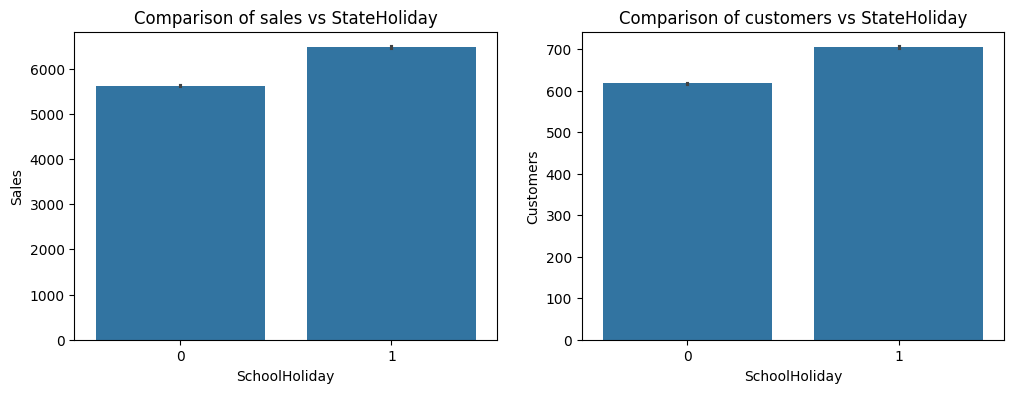

In [5]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

sns.barplot(x='SchoolHoliday', y='Sales', data=df, ax=axis1).set_title('Comparison of sales vs StateHoliday')
sns.barplot(x='SchoolHoliday', y='Customers', data=df, ax=axis2).set_title('Comparison of customers vs StateHoliday')
plt.show()

StoreType vs Sales and Customers

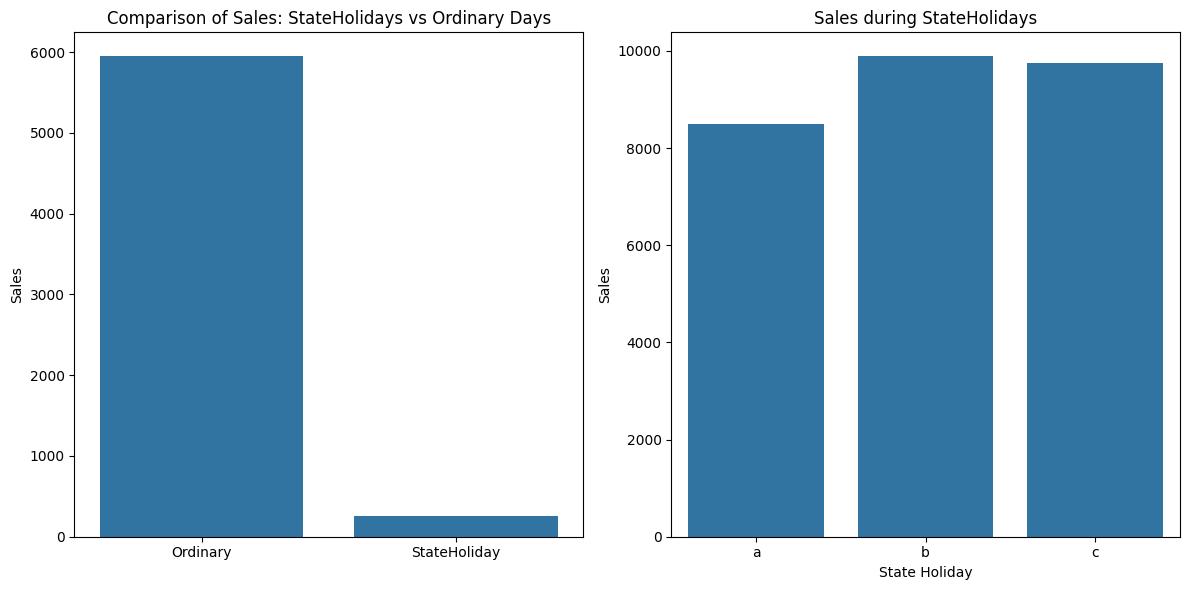

In [6]:
# Create the figure and subplots
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(12, 6))

# Prepare data for the first subplot
# Create a new column for grouping
df['Holiday_Type'] = df['StateHoliday'].replace({'0': 'Ordinary', 'a': 'StateHoliday', 'b': 'StateHoliday', 'c': 'StateHoliday'})

# First subplot: Comparison of sales during StateHolidays and ordinary days
sns.barplot(
    x='Holiday_Type', 
    y='Sales', 
    data=df, 
    ax=axis1, 
    errorbar=None  # Disable error bars
)
axis1.set_title('Comparison of Sales: StateHolidays vs Ordinary Days')
axis1.set_ylabel('Sales')
axis1.set_xlabel('')

# Prepare data for the second subplot
# Filter the data for StateHolidays only
mask = (df["StateHoliday"] != "0") & (df["Sales"] > 0)
sns.barplot(
    x='StateHoliday', 
    y='Sales', 
    data=df[mask], 
    ax=axis2, 
    errorbar=None  # Disable error bars
)
axis2.set_title('Sales during StateHolidays')
axis2.set_ylabel('Sales')
axis2.set_xlabel('State Holiday')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Assortment vs Sales and Customers

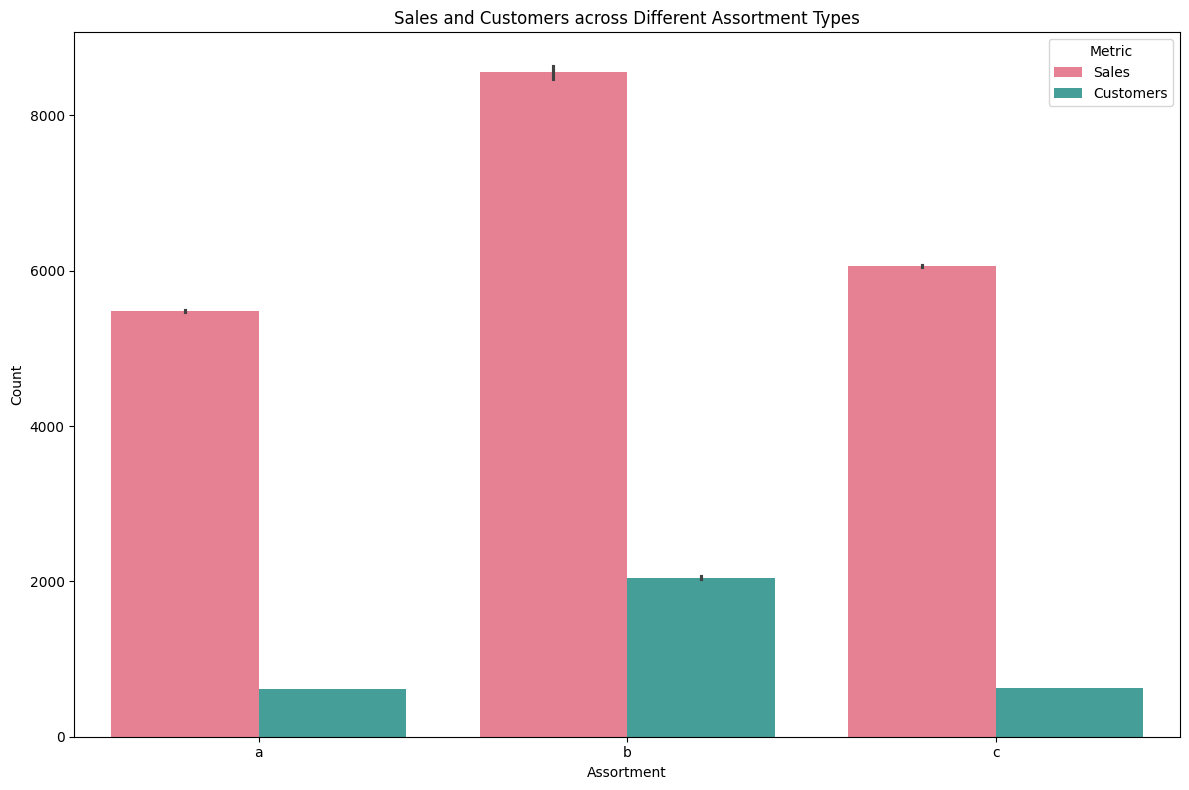

In [7]:
# Create the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Melt the DataFrame to have a long format for grouped bar plots
melted_df = df.melt(id_vars='Assortment', value_vars=['Sales', 'Customers'], var_name='Metric', value_name='Value')

# Create the grouped barplot
sns.barplot(
    x='Assortment', 
    y='Value', 
    hue='Metric',  # Differentiate between Sales and Customers
    data=melted_df, 
    palette='husl', 
    order=['a', 'b', 'c'], 
    ax=ax
)

# Set titles and labels
ax.set_title('Sales and Customers across Different Assortment Types')
ax.set_xlabel('Assortment')
ax.set_ylabel('Count')
plt.legend(title='Metric')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

DayOfWeek vs Sales and Customers

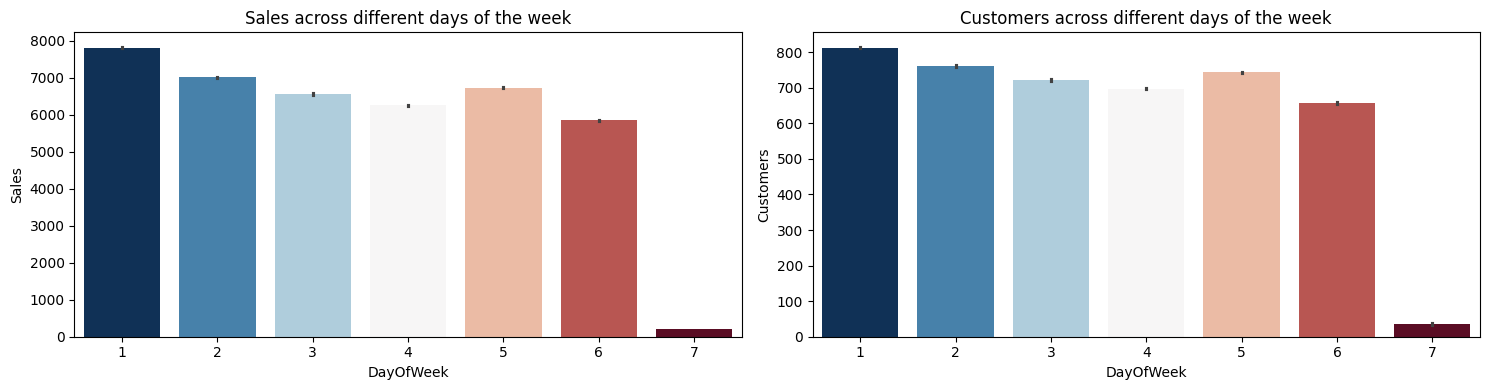

In [8]:
# Create the figure and subplots
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))

# First subplot: Sales across different days of the week
sns.barplot(
    x='DayOfWeek', 
    y='Sales', 
    hue='DayOfWeek',  # Assign hue to DayOfWeek
    data=df, 
    palette='RdBu_r', 
    ax=axis1, 
    legend=False  # Disable legend
).set_title('Sales across different days of the week')

# Second subplot: Customers across different days of the week
sns.barplot(
    x='DayOfWeek', 
    y='Customers', 
    hue='DayOfWeek',  # Assign hue to DayOfWeek
    data=df, 
    palette='RdBu_r', 
    ax=axis2, 
    legend=False  # Disable legend
).set_title('Customers across different days of the week')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Promo vs Sales and Customers

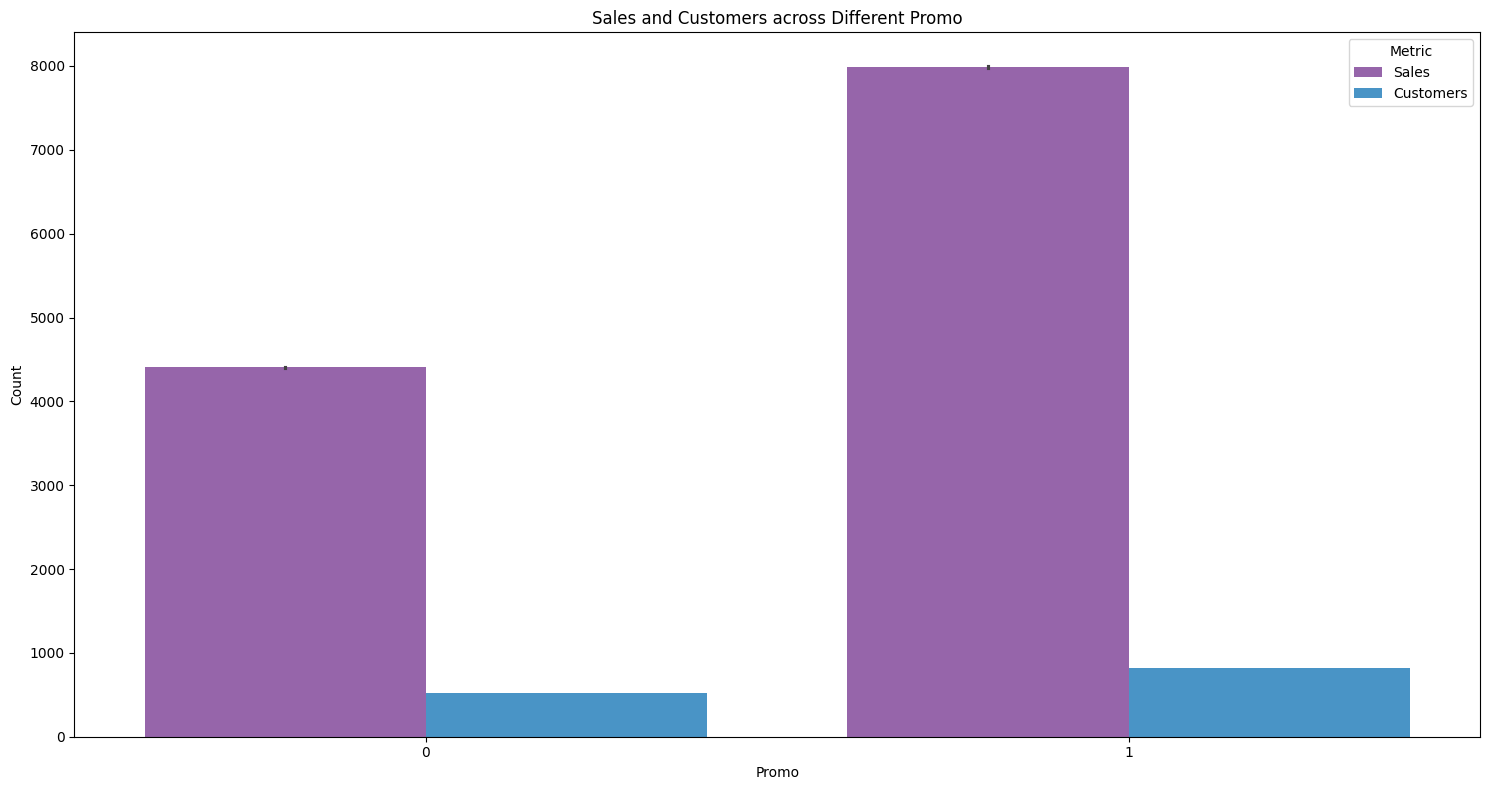

In [9]:
# Use only two colors from the flatui palette
flatui = ["#9b59b6", "#3498db"]

# Create the figure
fig, ax = plt.subplots(figsize=(15, 8))

# Melt the DataFrame to have a long format for grouped bar plots
melted_df = df.melt(id_vars='Promo', value_vars=['Sales', 'Customers'], var_name='Metric', value_name='Value')

# Create the grouped barplot
sns.barplot(
    x='Promo', 
    y='Value', 
    hue='Metric',  # Differentiate between Sales and Customers
    data=melted_df, 
    palette=flatui, 
    ax=ax
)

# Set titles and labels
ax.set_title('Sales and Customers across Different Promo')
ax.set_xlabel('Promo')
ax.set_ylabel('Count')
plt.legend(title='Metric')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Promo2 vs Sales and Customers

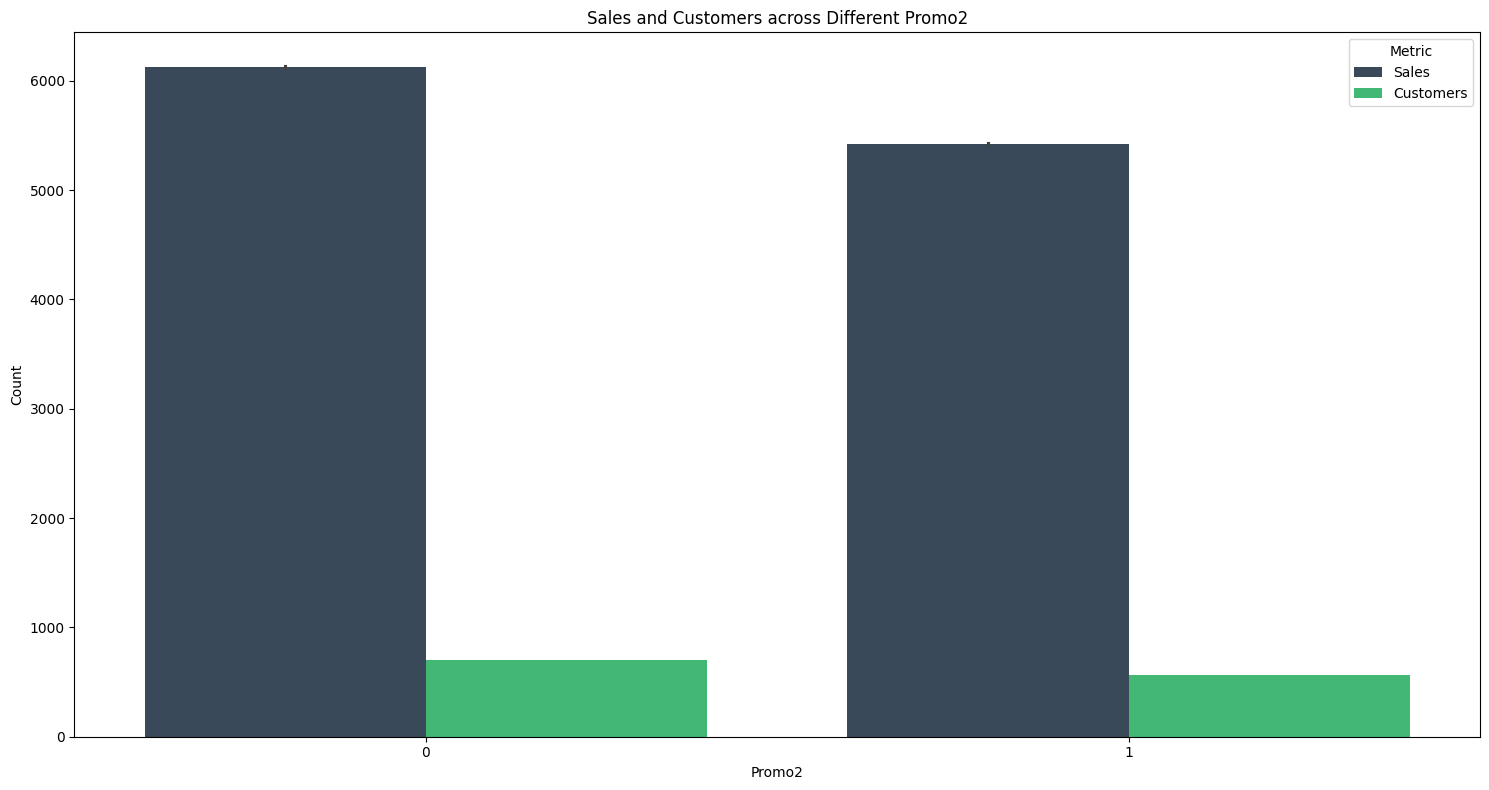

In [10]:
# Define the palette for two categories
flatui = ["#34495e", "#2ecc71"]

# Create the figure
fig, ax = plt.subplots(figsize=(15, 8))

# Melt the DataFrame to have a long format for grouped bar plots
melted_df = df.melt(id_vars='Promo2', value_vars=['Sales', 'Customers'], var_name='Metric', value_name='Value')

# Create the grouped barplot
sns.barplot(
    x='Promo2', 
    y='Value', 
    hue='Metric',  # Differentiate between Sales and Customers
    data=melted_df, 
    palette=flatui, 
    ax=ax
)

# Set titles and labels
ax.set_title('Sales and Customers across Different Promo2')
ax.set_xlabel('Promo2')
ax.set_ylabel('Count')
plt.legend(title='Metric')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

PromoInterval vs Sales and Customers

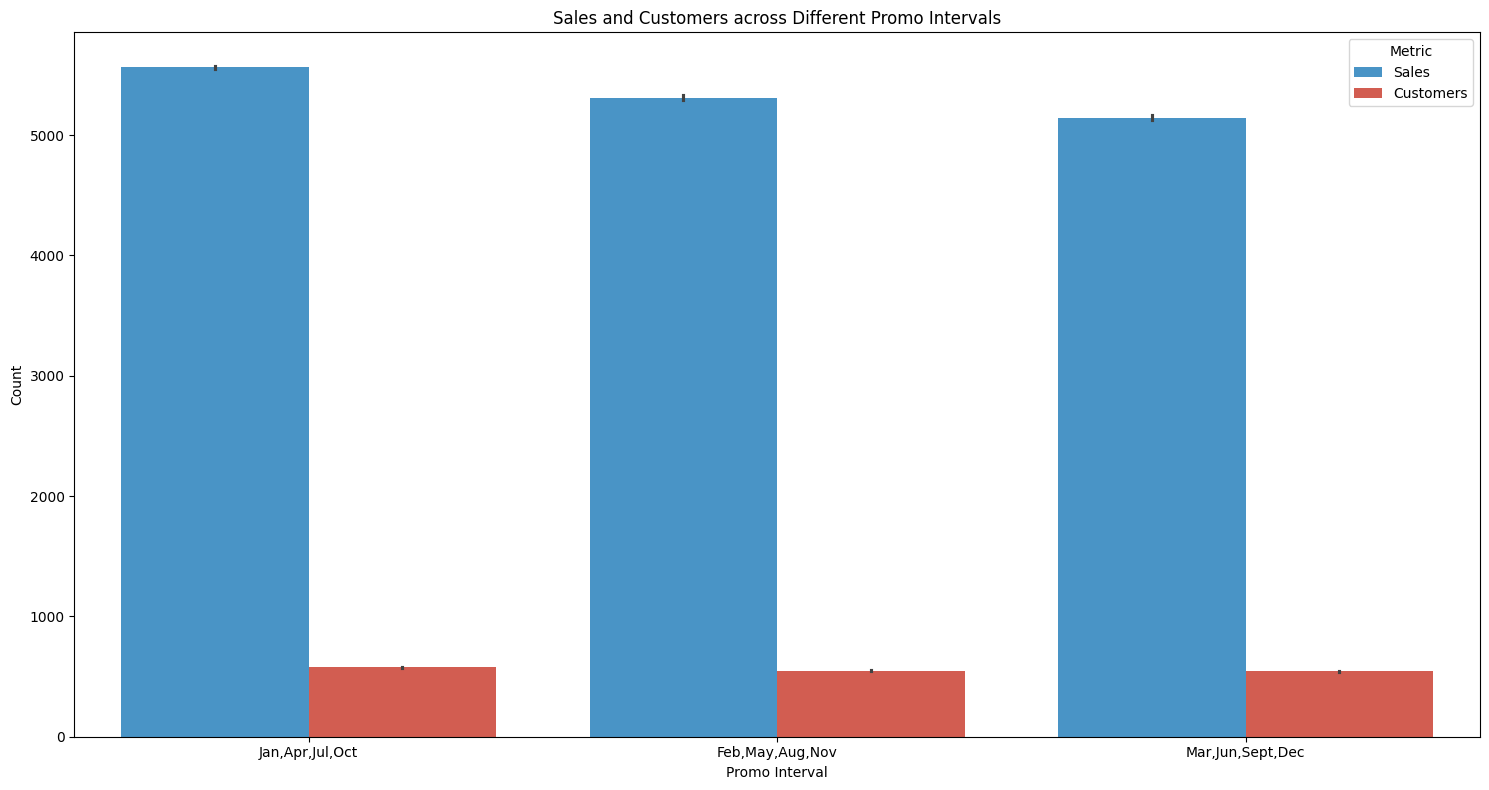

In [11]:
# Define a simplified color palette for two metrics
flatui = ["#3498db", "#e74c3c"]  # Two colors for Sales and Customers

# Create the figure
fig, ax = plt.subplots(figsize=(15, 8))

# Mask for values with Promo2
mask = (df["Promo2"] != 0)

# Melt the DataFrame to have a long format for grouped bar plots
melted_df = df[mask].melt(id_vars='PromoInterval', value_vars=['Sales', 'Customers'], var_name='Metric', value_name='Value')

# Create the grouped barplot
sns.barplot(
    x='PromoInterval', 
    y='Value', 
    hue='Metric',  # Differentiate between Sales and Customers
    data=melted_df, 
    palette=flatui, 
    ax=ax
)

# Set titles and labels
ax.set_title('Sales and Customers across Different Promo Intervals')
ax.set_xlabel('Promo Interval')
ax.set_ylabel('Count')
plt.legend(title='Metric')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Open and DayOfWeek

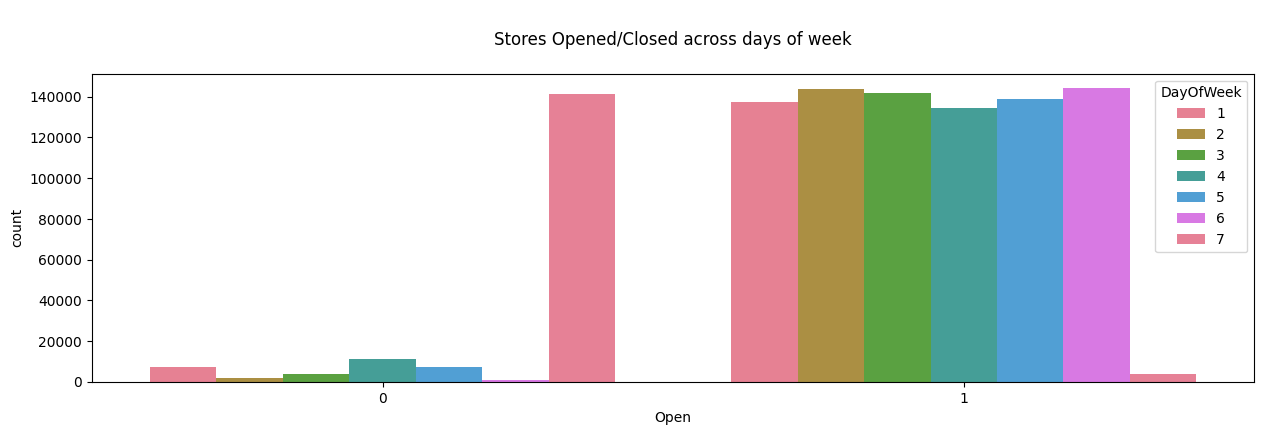

In [12]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=df,palette="husl", ax=axis1).set_title('\nStores Opened/Closed across days of week\n')
plt.show()

Sales and Month

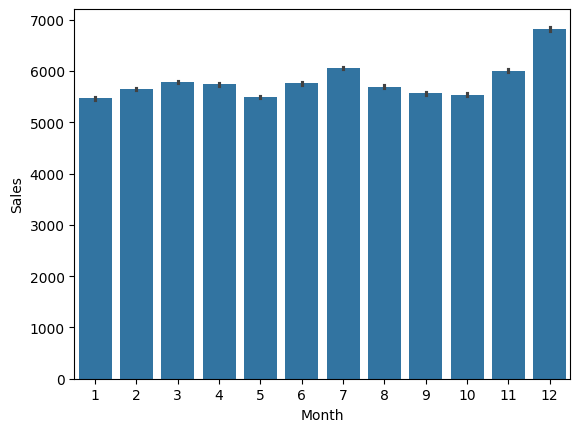

In [13]:
sns.barplot(x='Month', y='Sales', data=df)
plt.show()

CompetitionDistance and Sales

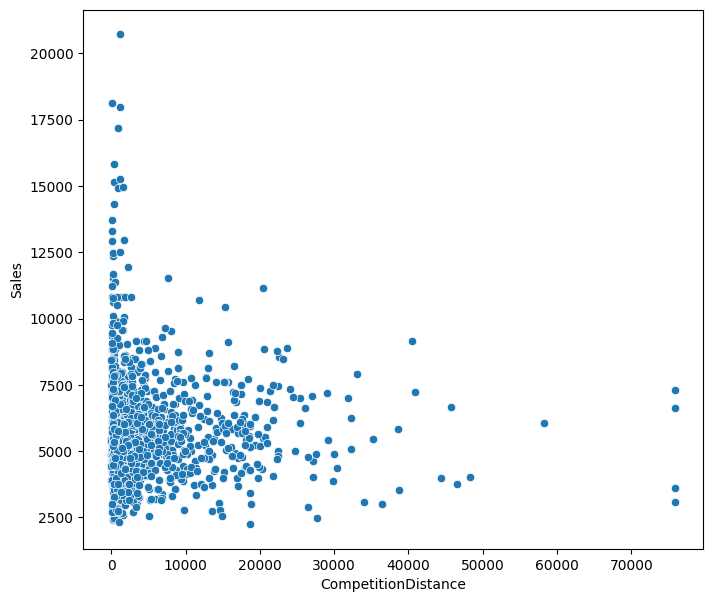

In [14]:
dist = df.groupby('Store').agg({
    'CompetitionDistance': 'mean',
    'Sales': 'mean',
    'Customers': 'mean'
})
plt.subplots(figsize = (8, 7))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=dist)
plt.show()

Correlation Analysis

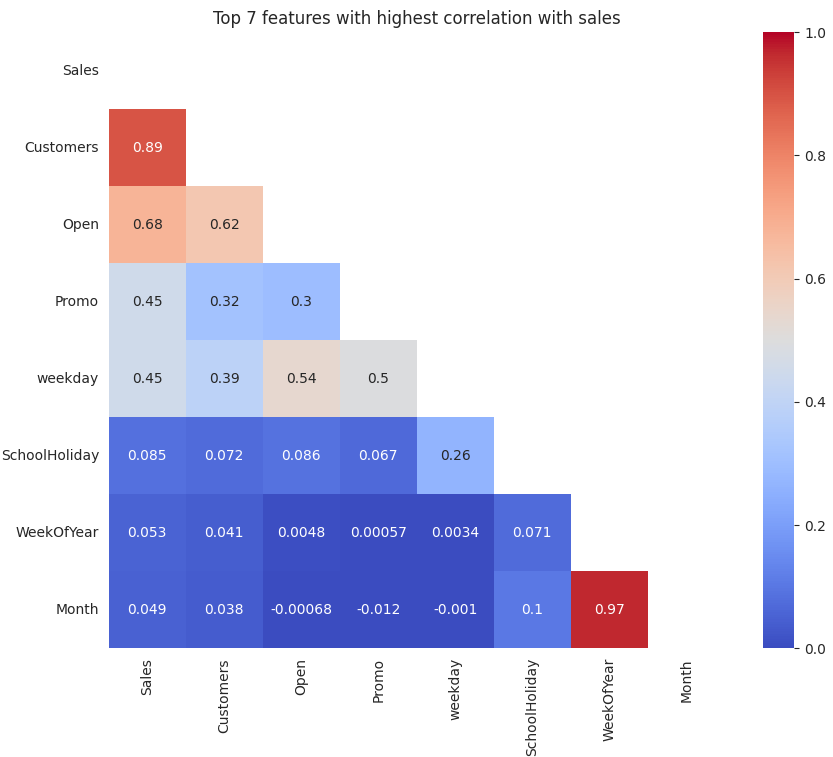

In [15]:
# Step 2: Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Step 3: Compute correlation
f_most_correlated = numeric_df.corr().nlargest(8, 'Sales')['Sales'].index
f_correlation = numeric_df[f_most_correlated].corr()

# Generate a mask for the upper triangle
f_mask = np.zeros_like(f_correlation)
f_mask[np.triu_indices_from(f_mask)] = True
with sns.axes_style("white"):
    f_fig, f_ax = plt.subplots(figsize=(10, 8))
    f_ax = sns.heatmap(f_correlation, mask=f_mask, vmin=0, vmax=1, square=True,
                        annot=True, annot_kws={"size": 10}, cmap="coolwarm")
plt.title('Top 7 features with highest correlation with sales')
plt.show()

## Filtering Data and Answering Business Questions

Distribution of promotion in the training and test datasets

In [16]:
# reading test data
test_df = pd.read_csv("../data/rossmann-store-sales_data/test.csv")
test_df.head(4)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0


In [17]:
# reading test data
train_df = pd.read_csv("../data/rossmann-store-sales_data/train.csv", low_memory=False)
train_df.head(4)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1


C:\Users\1221\AppData\Local\Temp\ipykernel_5980\875306674.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


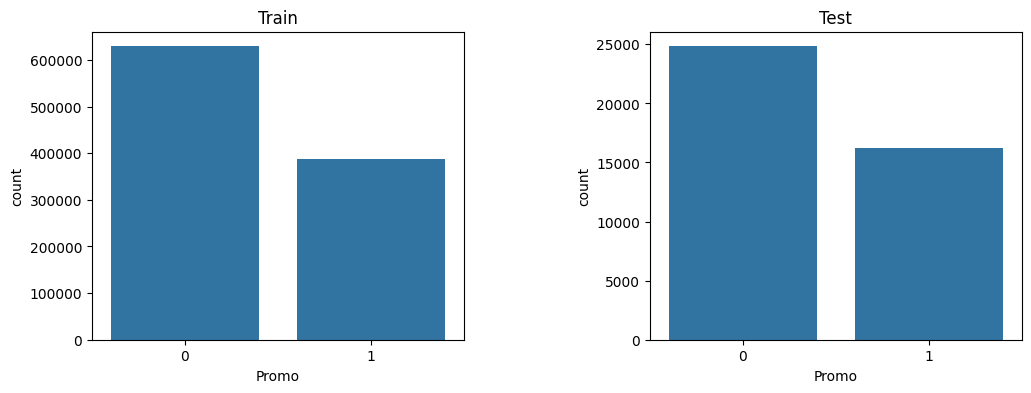

In [18]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 4))
ax[0].set_title("Train")
sns.countplot(x='Promo', data=train_df, ax=ax[0])
ax[1].set_title("Test")
sns.countplot(x='Promo', data=test_df, ax=ax[1])
fig.subplots_adjust(wspace=0.5)
fig.show()

The distribution of promotion is almost the same in both datasets.

## Monthly sales trend per store type

In [19]:
store_type_a = df[df.StoreType == 'a']
store_type_b = df[df.StoreType == 'b']
store_type_c = df[df.StoreType == 'c']
store_type_d = df[df.StoreType == 'd']

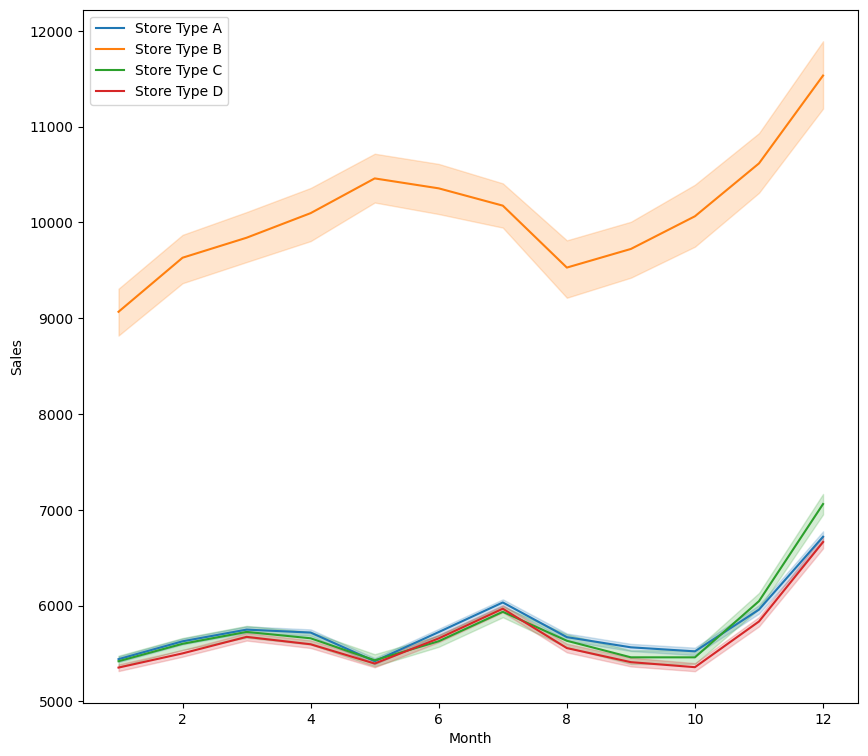

In [20]:
plt.subplots(figsize = (10, 9))
sns.lineplot(x = store_type_a.Month, y = store_type_a.Sales, label="Store Type A")
sns.lineplot(x = store_type_b.Month, y = store_type_b.Sales, label="Store Type B")
sns.lineplot(x = store_type_c.Month, y = store_type_c.Sales, label="Store Type C")
sns.lineplot(x = store_type_d.Month, y = store_type_d.Sales, label="Store Type D")
plt.show()